In [1]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
from scipy.stats import norm, kurtosis,skew
from sklearn.cluster import KMeans
from mpl_toolkits.mplot3d import Axes3D
from scipy import stats, optimize
import seaborn as sns
import matplotlib.mlab as mlab
from scipy.spatial import ConvexHull, convex_hull_plot_2d

%run ../funtion/Funciones.ipynb

# Prova Matematica Computacional

## Input Covi19 10 marco - 28 maio

In [2]:
data = pd.read_csv("../data/Covid19_25jan_10jun.csv") 
data.drop(['iso_code','total_cases_per_million','new_cases_per_million','total_deaths_per_million',
            'handwashing_facilities','male_smokers','female_smokers',
            'cvd_death_rate','extreme_poverty','gdp_per_capita','aged_70_older','aged_65_older',
            'median_age','population_density','population','stringency_index','tests_units',
            'total_tests_per_thousand','new_tests_smoothed_per_thousand','new_tests_smoothed',
            'new_tests_per_thousand','new_tests','total_tests','new_deaths_per_million',
            'diabetes_prevalence'],axis=1)
data['date'] = pd.to_datetime(data['date'])

## Brasil

In [3]:
covid19_brazil = data[data.location == 'Brazil']
covid19_brazil = covid19_brazil.reset_index(drop=True)
covid19_casos_brazil = covid19_brazil.new_cases[70:150].reset_index(drop=True)
covid19_total_brazil = covid19_brazil.total_cases[70:150].reset_index(drop=True)
covid19_brazil.date[70],covid19_brazil.date[150]

(Timestamp('2020-03-10 00:00:00'), Timestamp('2020-05-29 00:00:00'))

## United Stated

In [4]:
covid19_usa = data[data.location == 'United States']
covid19_usa = covid19_usa.reset_index(drop=True)
covid19_casos_usa = covid19_usa.new_cases[70:150].reset_index(drop=True)
covid19_total_usa = covid19_usa.total_cases[70:150].reset_index(drop=True)
covid19_usa.date[70],covid19_usa.date[150]

(Timestamp('2020-03-10 00:00:00'), Timestamp('2020-05-29 00:00:00'))

## Canada

In [5]:
covid19_canada = data[data.location == 'Canada']
covid19_canada = covid19_canada.reset_index(drop=True)
covid19_casos_canada = covid19_canada.new_cases[70:150].reset_index(drop=True)
covid19_total_canada = covid19_canada.total_cases[70:150].reset_index(drop=True)
covid19_canada.date[70],covid19_canada.date[150]

(Timestamp('2020-03-10 00:00:00'), Timestamp('2020-05-29 00:00:00'))

## Espanha

In [6]:
covid19_espana = data[data.location == 'Spain']
covid19_espana = covid19_espana.reset_index(drop=True)
covid19_casos_espana = covid19_espana.new_cases[70:150].reset_index(drop=True)
covid19_total_espana = covid19_espana.total_cases[70:150].reset_index(drop=True)
covid19_espana.date[70],covid19_espana.date[150]

(Timestamp('2020-03-10 00:00:00'), Timestamp('2020-05-29 00:00:00'))

## Italia

In [7]:
covid19_italia = data[data.location == 'Italy']
covid19_italia = covid19_italia.reset_index(drop=True)
covid19_casos_italia = covid19_italia.new_cases[70:150].reset_index(drop=True)
covid19_total_italia = covid19_italia.total_cases[70:150].reset_index(drop=True)
covid19_italia.date[70],covid19_italia.date[150]

(Timestamp('2020-03-10 00:00:00'), Timestamp('2020-05-29 00:00:00'))

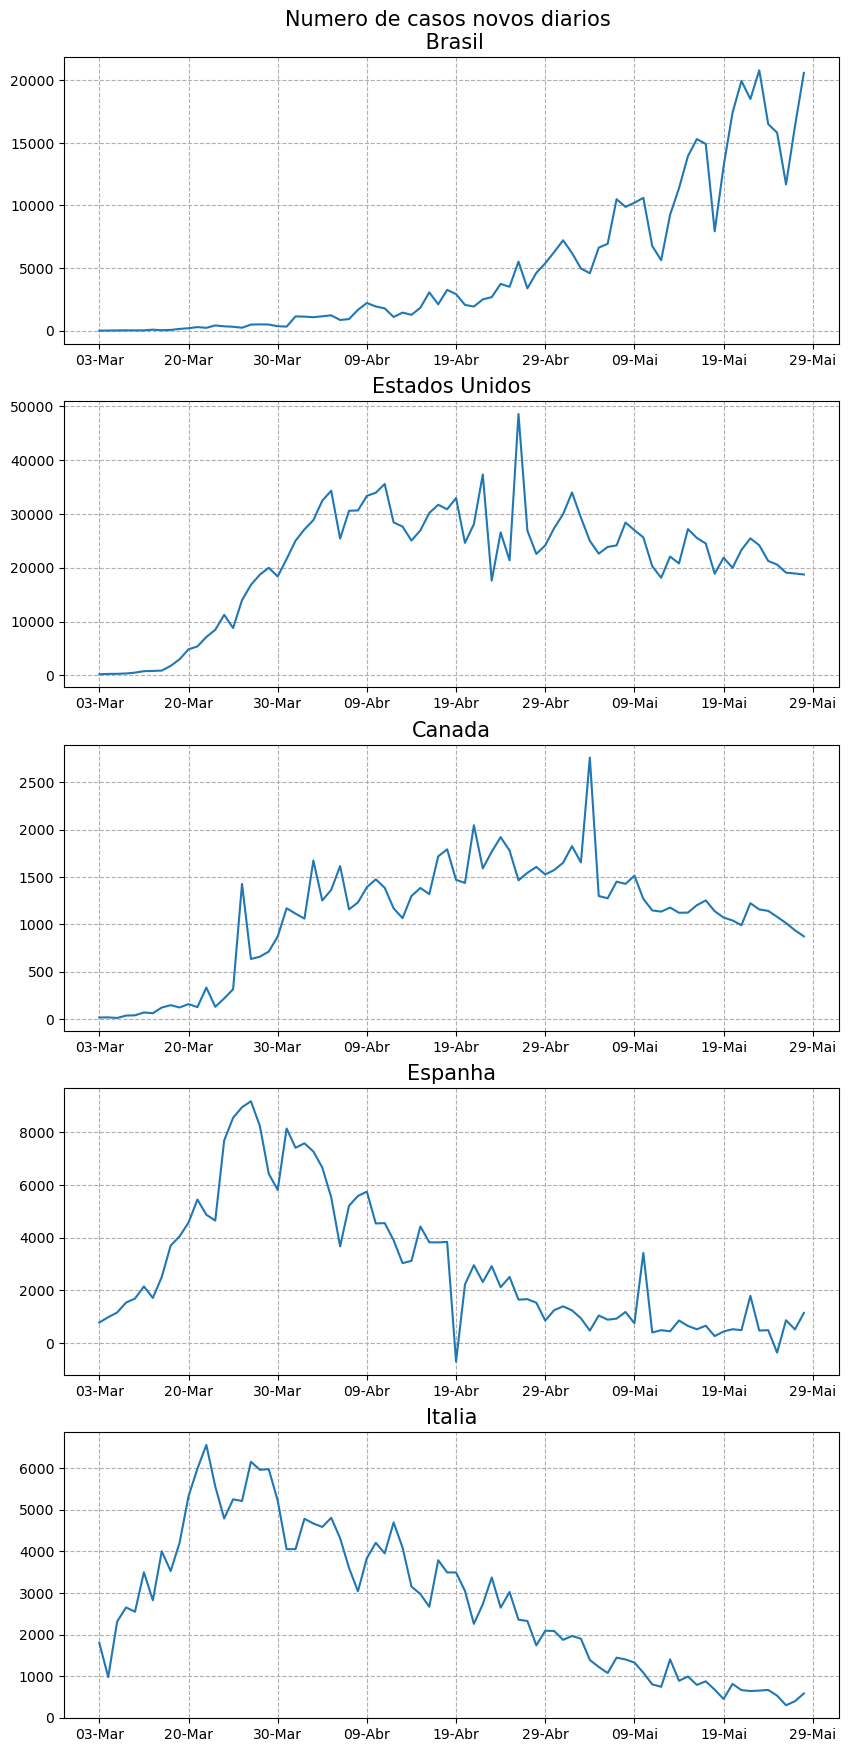

In [8]:
fig = plt.figure(figsize=(10,22),dpi=100)
x = np.arange(0,len(covid19_casos_brazil),1)

ax = plt.subplot(5,1,1)
plt.plot(x,covid19_casos_brazil)
labels = [item.get_text() for item in ax.get_xticklabels()]
labels[1] = '03-Mar'
labels[2] = '20-Mar'
labels[3] = '30-Mar'
labels[4] = '09-Abr'
labels[5] = '19-Abr'
labels[6] = '29-Abr'
labels[7] = '09-Mai'
labels[8] = '19-Mai'
labels[9] = '29-Mai'
plt.title('Numero de casos novos diarios \n Brasil',fontsize=15)
ax.set_xticklabels(labels)
plt.grid('on',linestyle='--')

ax = plt.subplot(5,1,2)
plt.plot(x,covid19_casos_usa)
labels = [item.get_text() for item in ax.get_xticklabels()]
labels[1] = '03-Mar'
labels[2] = '20-Mar'
labels[3] = '30-Mar'
labels[4] = '09-Abr'
labels[5] = '19-Abr'
labels[6] = '29-Abr'
labels[7] = '09-Mai'
labels[8] = '19-Mai'
labels[9] = '29-Mai'
plt.title('Estados Unidos',fontsize=15)
ax.set_xticklabels(labels)
plt.grid('on',linestyle='--')

ax = plt.subplot(5,1,3)
plt.plot(x,covid19_casos_canada)
labels = [item.get_text() for item in ax.get_xticklabels()]
labels[1] = '03-Mar'
labels[2] = '20-Mar'
labels[3] = '30-Mar'
labels[4] = '09-Abr'
labels[5] = '19-Abr'
labels[6] = '29-Abr'
labels[7] = '09-Mai'
labels[8] = '19-Mai'
labels[9] = '29-Mai'
plt.title('Canada',fontsize=15)
ax.set_xticklabels(labels)
plt.grid('on',linestyle='--')

ax = plt.subplot(5,1,4)
plt.plot(x,covid19_casos_espana)
labels = [item.get_text() for item in ax.get_xticklabels()]
labels[1] = '03-Mar'
labels[2] = '20-Mar'
labels[3] = '30-Mar'
labels[4] = '09-Abr'
labels[5] = '19-Abr'
labels[6] = '29-Abr'
labels[7] = '09-Mai'
labels[8] = '19-Mai'
labels[9] = '29-Mai'
plt.title('Espanha',fontsize=15)
ax.set_xticklabels(labels)
plt.grid('on',linestyle='--')

ax = plt.subplot(5,1,5)
plt.plot(x,covid19_casos_italia)
labels = [item.get_text() for item in ax.get_xticklabels()]
labels[1] = '03-Mar'
labels[2] = '20-Mar'
labels[3] = '30-Mar'
labels[4] = '09-Abr'
labels[5] = '19-Abr'
labels[6] = '29-Abr'
labels[7] = '09-Mai'
labels[8] = '19-Mai'
labels[9] = '29-Mai'
plt.title('Italia',fontsize=15)
ax.set_xticklabels(labels)
plt.grid('on',linestyle='--')

## 5 Paises

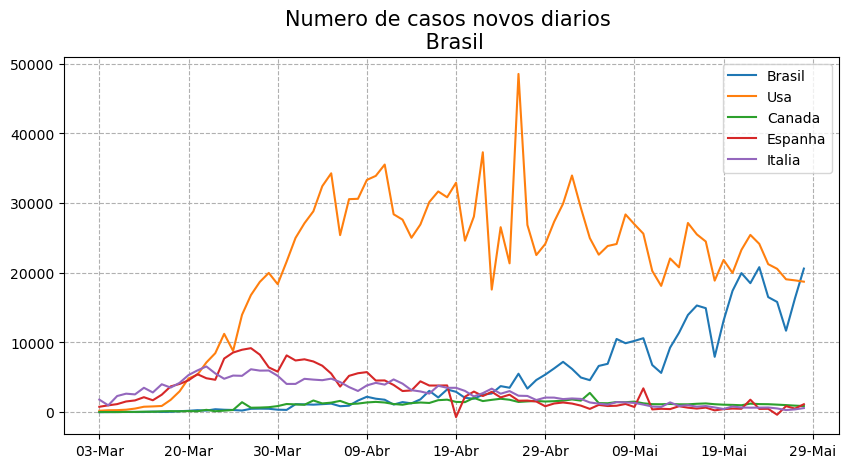

In [9]:
fig,ax = plt.subplots(figsize=(10,5),dpi=100)
x = np.arange(0,len(covid19_casos_brazil),1)

plt.plot(x,covid19_casos_brazil,label='Brasil')
plt.plot(x,covid19_casos_usa,label='Usa')
plt.plot(x,covid19_casos_canada,label='Canada')
plt.plot(x,covid19_casos_espana,label='Espanha')
plt.plot(x,covid19_casos_italia,label='Italia')
labels = [item.get_text() for item in ax.get_xticklabels()]
labels[1] = '03-Mar'
labels[2] = '20-Mar'
labels[3] = '30-Mar'
labels[4] = '09-Abr'
labels[5] = '19-Abr'
labels[6] = '29-Abr'
labels[7] = '09-Mai'
labels[8] = '19-Mai'
labels[9] = '29-Mai'
plt.title('Numero de casos novos diarios \n Brasil',fontsize=15)
ax.set_xticklabels(labels)
plt.grid('on',linestyle='--')
plt.legend()

## Plot 1 - Histograma

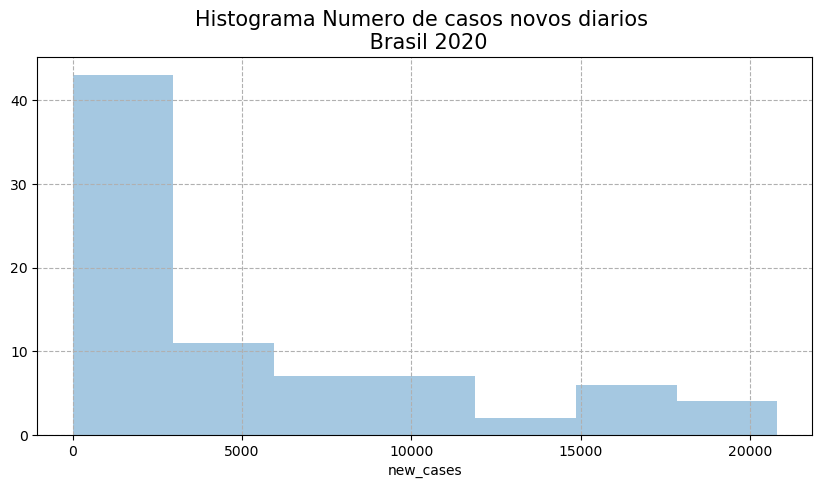

In [10]:
fig, ax = plt.subplots(figsize=(10,5),dpi=100)
sns.distplot(covid19_casos_brazil,kde=False)
plt.title('Histograma Numero de casos novos diarios \n Brasil 2020',fontsize=15)
plt.grid('on',linestyle='--')

## Plot 2 - Espaco de Cullen-Frey
## Brasil

<Figure size 4400x4000 with 0 Axes>

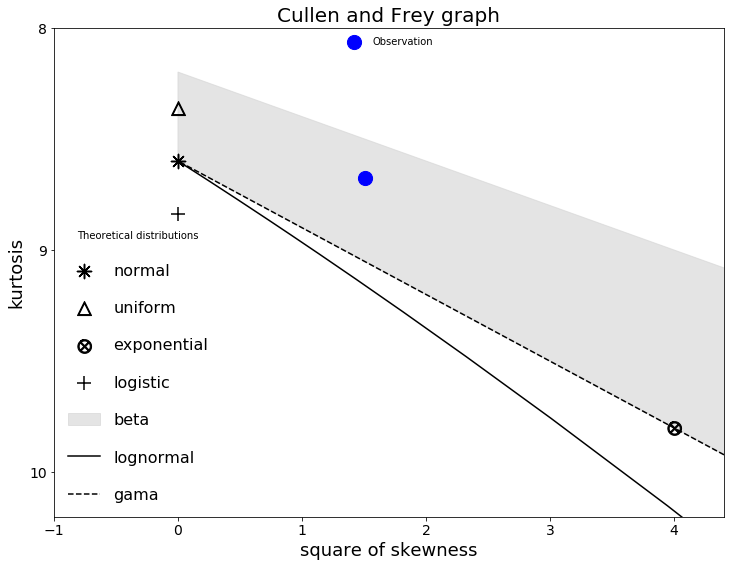

In [11]:
fig1 = plt.figure(figsize=(22,20),dpi=200)
cullen_frey(list(covid19_casos_brazil))

## USA

<Figure size 4400x4000 with 0 Axes>

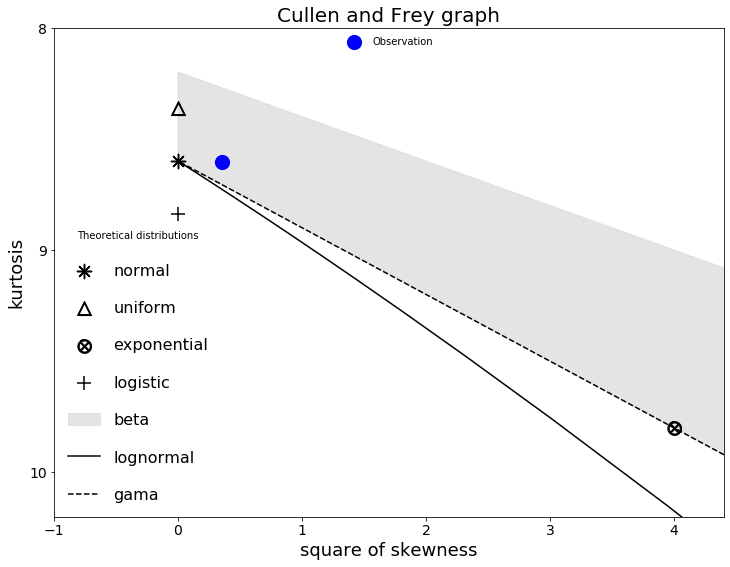

In [12]:
fig1 = plt.figure(figsize=(22,20),dpi=200)
cullen_frey(list(covid19_casos_usa))

## Canada

<Figure size 4400x4000 with 0 Axes>

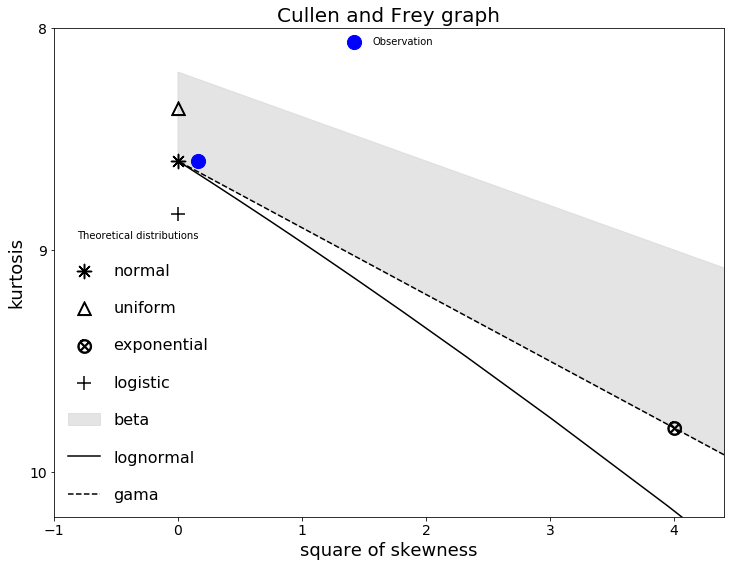

In [13]:
fig1 = plt.figure(figsize=(22,20),dpi=200)
cullen_frey(list(covid19_casos_canada))

## Espanha

<Figure size 4400x4000 with 0 Axes>

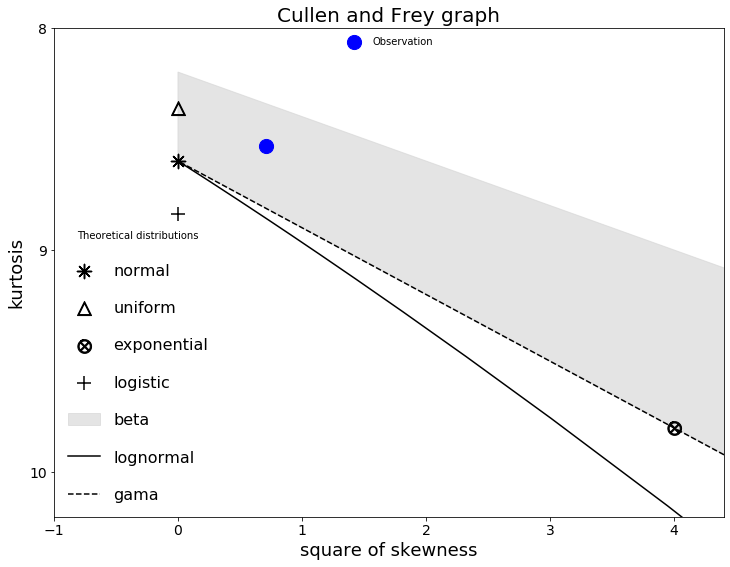

In [14]:
fig1 = plt.figure(figsize=(22,20),dpi=200)
cullen_frey(list(covid19_casos_espana))

## Italia

<Figure size 4400x4000 with 0 Axes>

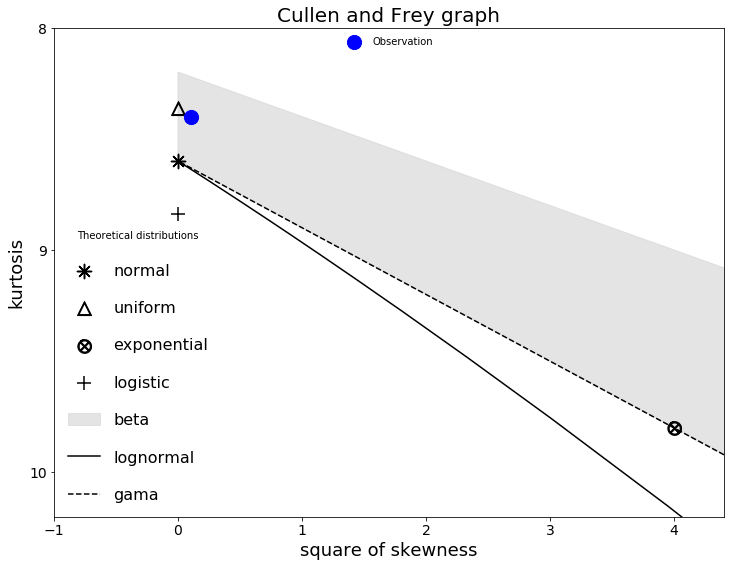

In [15]:
fig1 = plt.figure(figsize=(22,20),dpi=200)
cullen_frey(list(covid19_casos_italia))

## Os 5 paises apresentam uma distribuicao de tipo beta

## Plot 3 - Ajuste Histograma
## Brasil

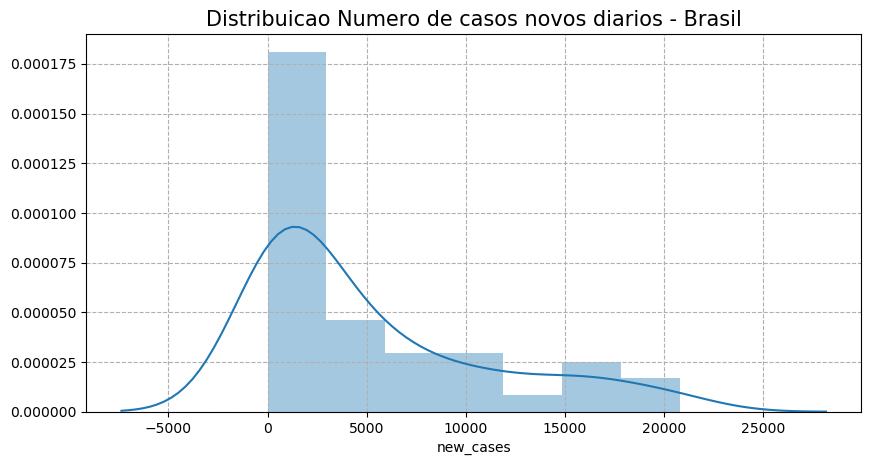

In [16]:
fig, ax = plt.subplots(figsize=(10,5),dpi=100)
sns.distplot(covid19_casos_brazil,kde=True)
plt.title('Distribuicao Numero de casos novos diarios - Brasil',fontsize=15)
plt.grid('on',linestyle='--')

## USA

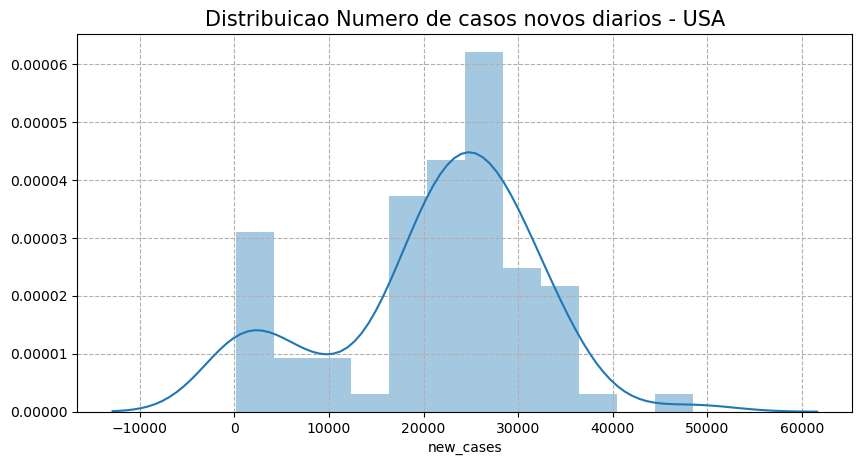

In [17]:
fig, ax = plt.subplots(figsize=(10,5),dpi=100)
sns.distplot(covid19_casos_usa,kde=True)
plt.title('Distribuicao Numero de casos novos diarios - USA',fontsize=15)
plt.grid('on',linestyle='--')

## Canada

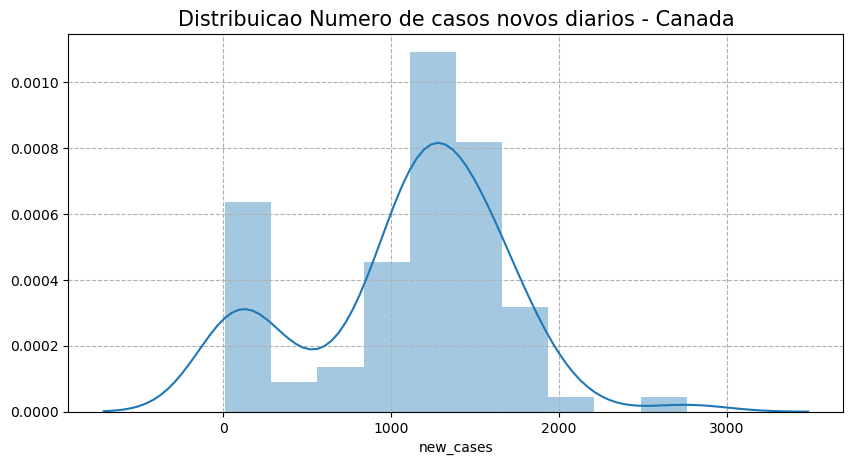

In [18]:
fig, ax = plt.subplots(figsize=(10,5),dpi=100)
sns.distplot(covid19_casos_canada,kde=True)
plt.title('Distribuicao Numero de casos novos diarios - Canada',fontsize=15)
plt.grid('on',linestyle='--')

## Espanha

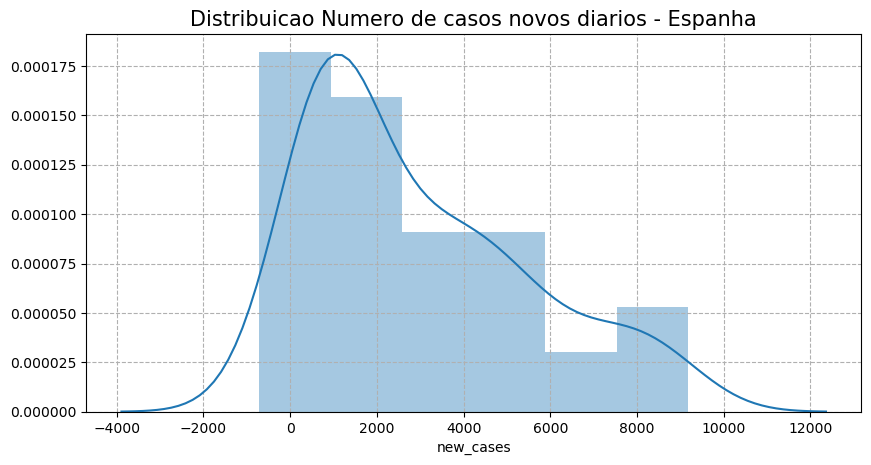

In [19]:
fig, ax = plt.subplots(figsize=(10,5),dpi=100)
sns.distplot(covid19_casos_espana,kde=True)
plt.title('Distribuicao Numero de casos novos diarios - Espanha',fontsize=15)
plt.grid('on',linestyle='--')

## Italia

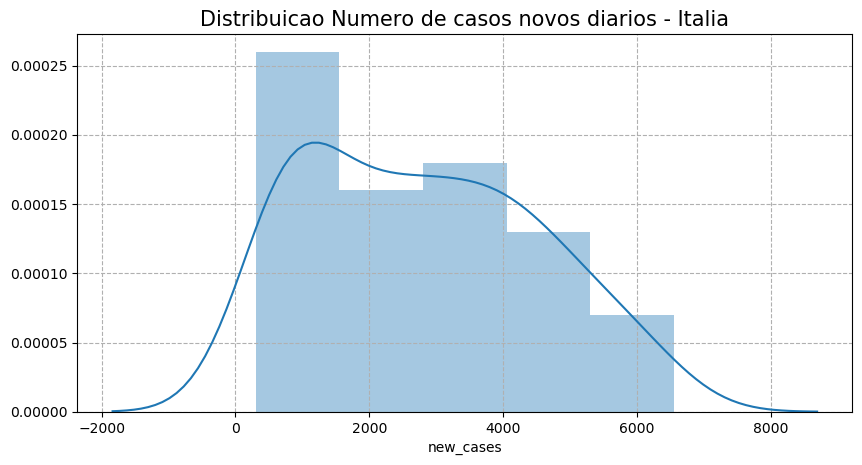

In [20]:
fig, ax = plt.subplots(figsize=(10,5),dpi=100)
sns.distplot(covid19_casos_italia,kde=True)
plt.title('Distribuicao Numero de casos novos diarios - Italia',fontsize=15)
plt.grid('on',linestyle='--')

## Figura 4 - Indice Espectral 
## Alpha e Betha
## Brasil

Alpha Brasil:  1.1173218115178365
Beta Teorico Brasil:  1.234643623035673


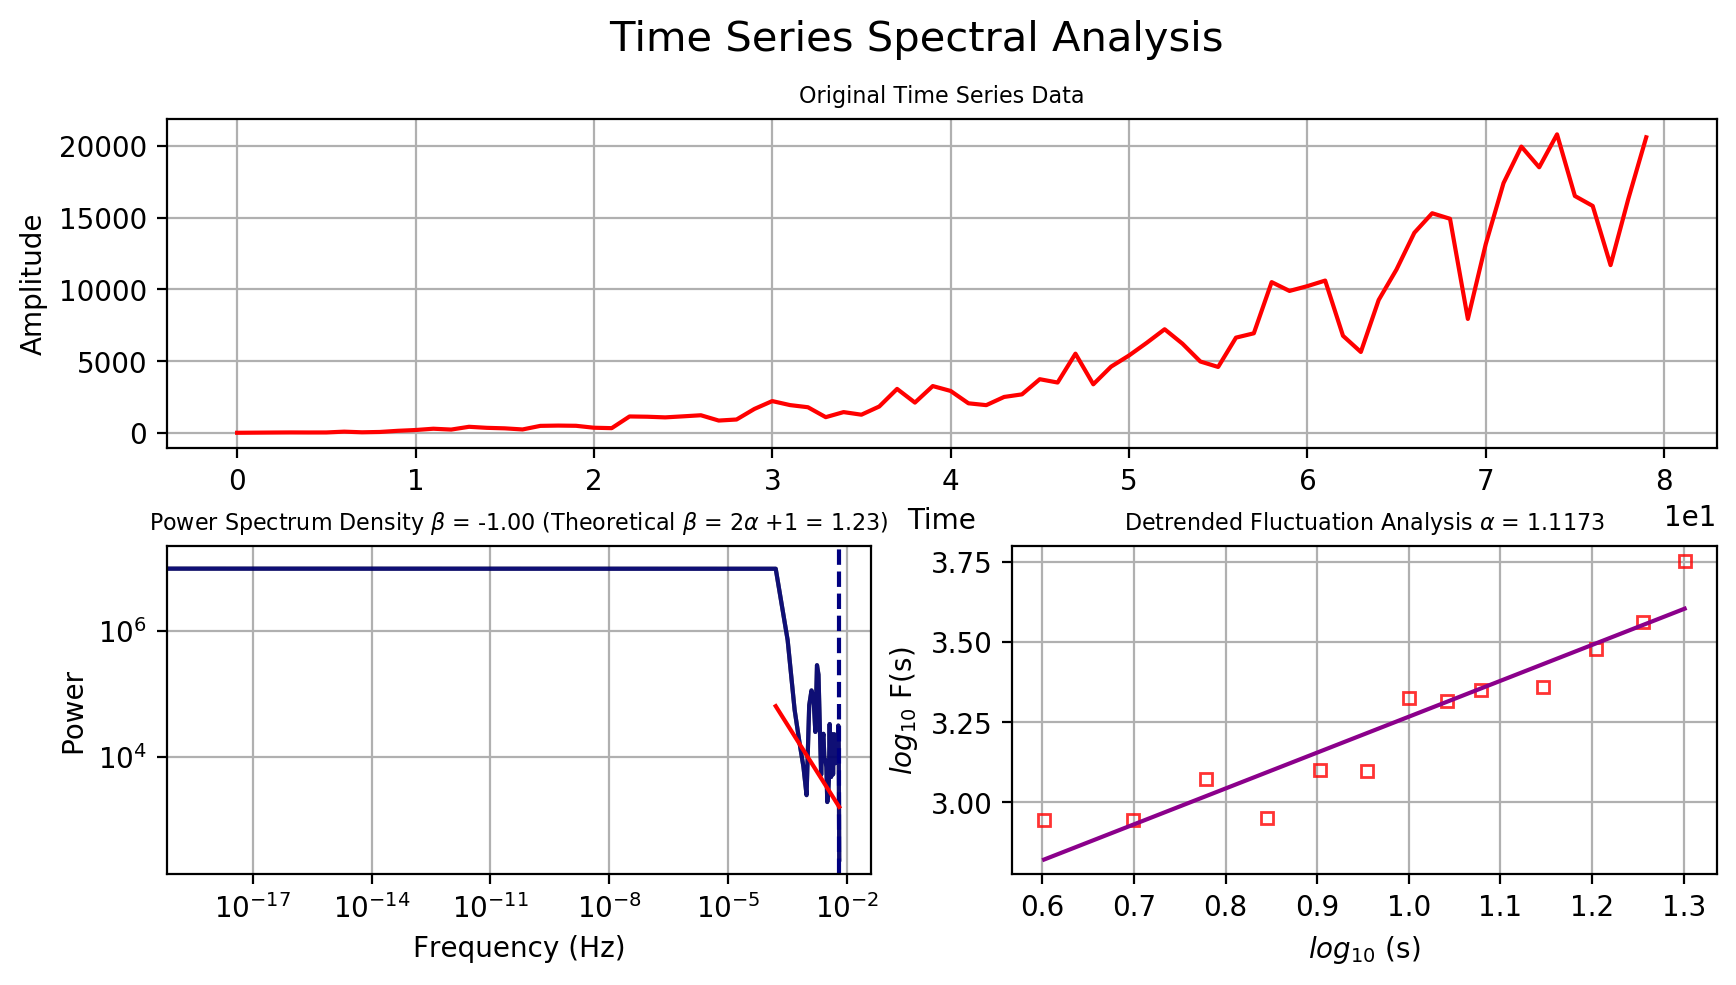

In [21]:
alpha_brasil, vetoutput, x, y, reta, erro = dfa1d(covid19_casos_brazil,1)
beta_brasil = 2 * alpha_brasil - 1

print('Alpha Brasil: ',alpha_brasil)
print('Beta Teorico Brasil: ',beta_brasil)

if __name__ == "__main__":
    alpha, beta_t = main(covid19_casos_brazil)
    plt.show()

Alpha usa:  0.9925830855515558
Beta Teorico usa:  0.9851661711031117


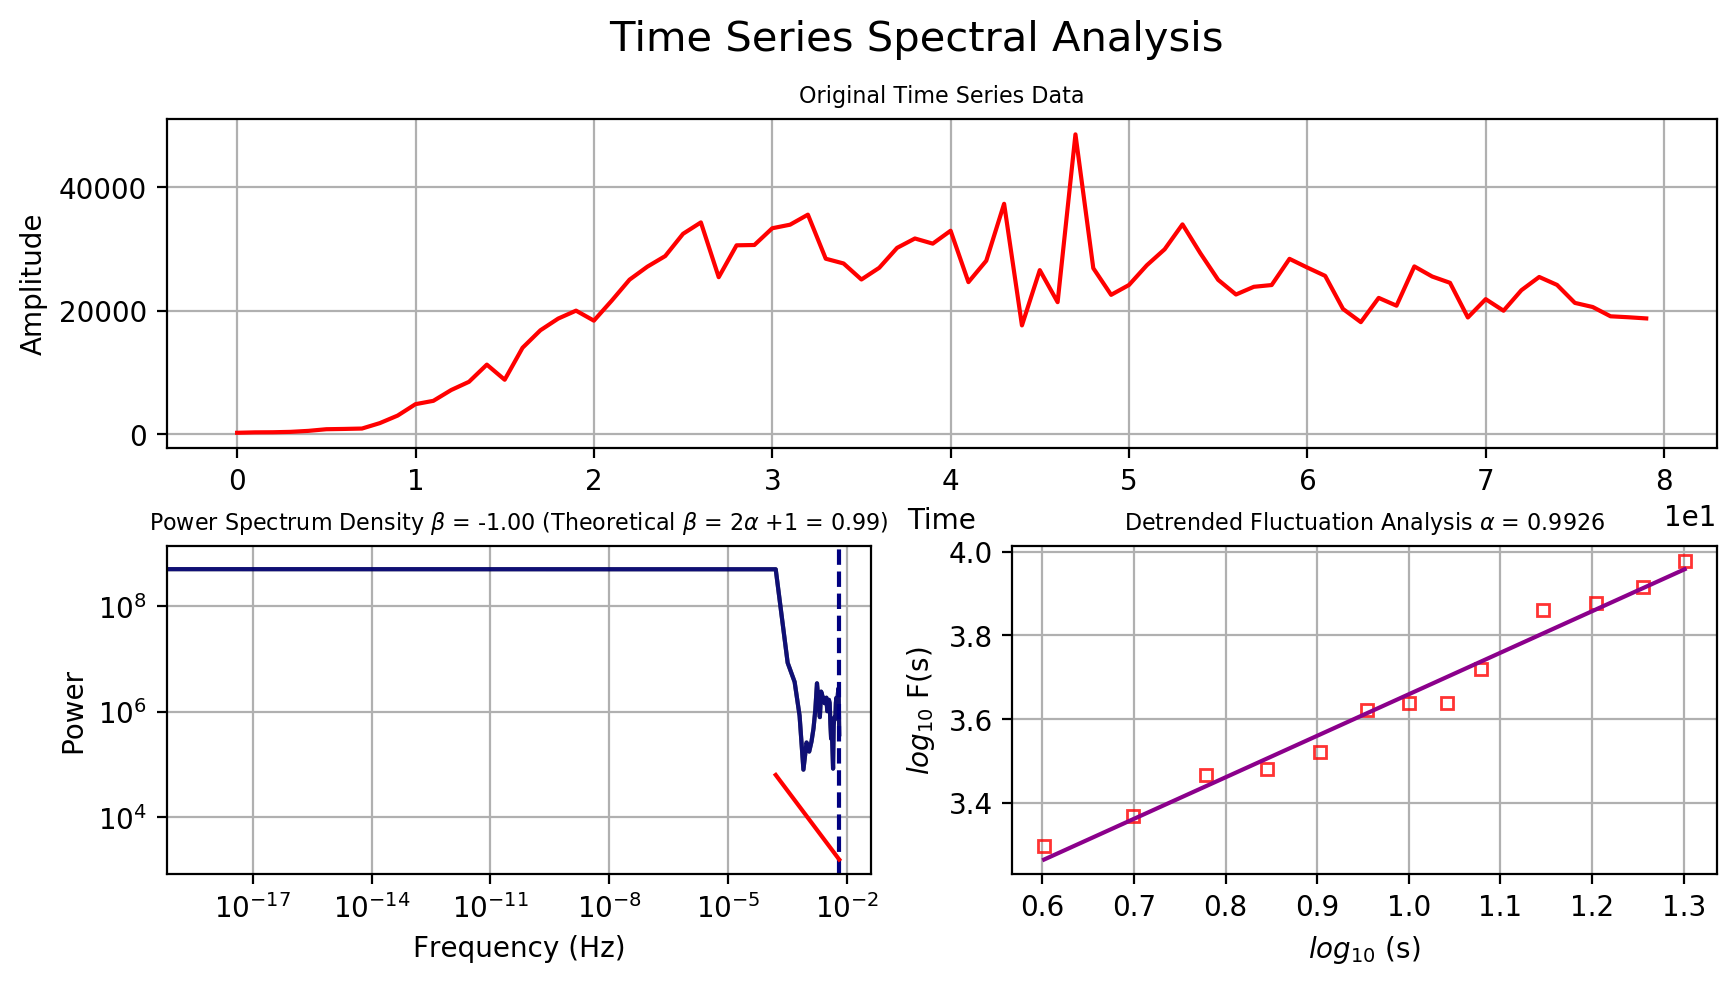

In [22]:
alpha_usa, vetoutput, x, y, reta, erro = dfa1d(covid19_casos_usa,1)
beta_usa = 2 * alpha_usa - 1

print('Alpha usa: ',alpha_usa)
print('Beta Teorico usa: ',beta_usa)

if __name__ == "__main__":
    alpha, beta_t = main(covid19_casos_usa)
    plt.show()

Alpha canada:  1.0443529412060741
Beta Teorico canada:  1.0887058824121483


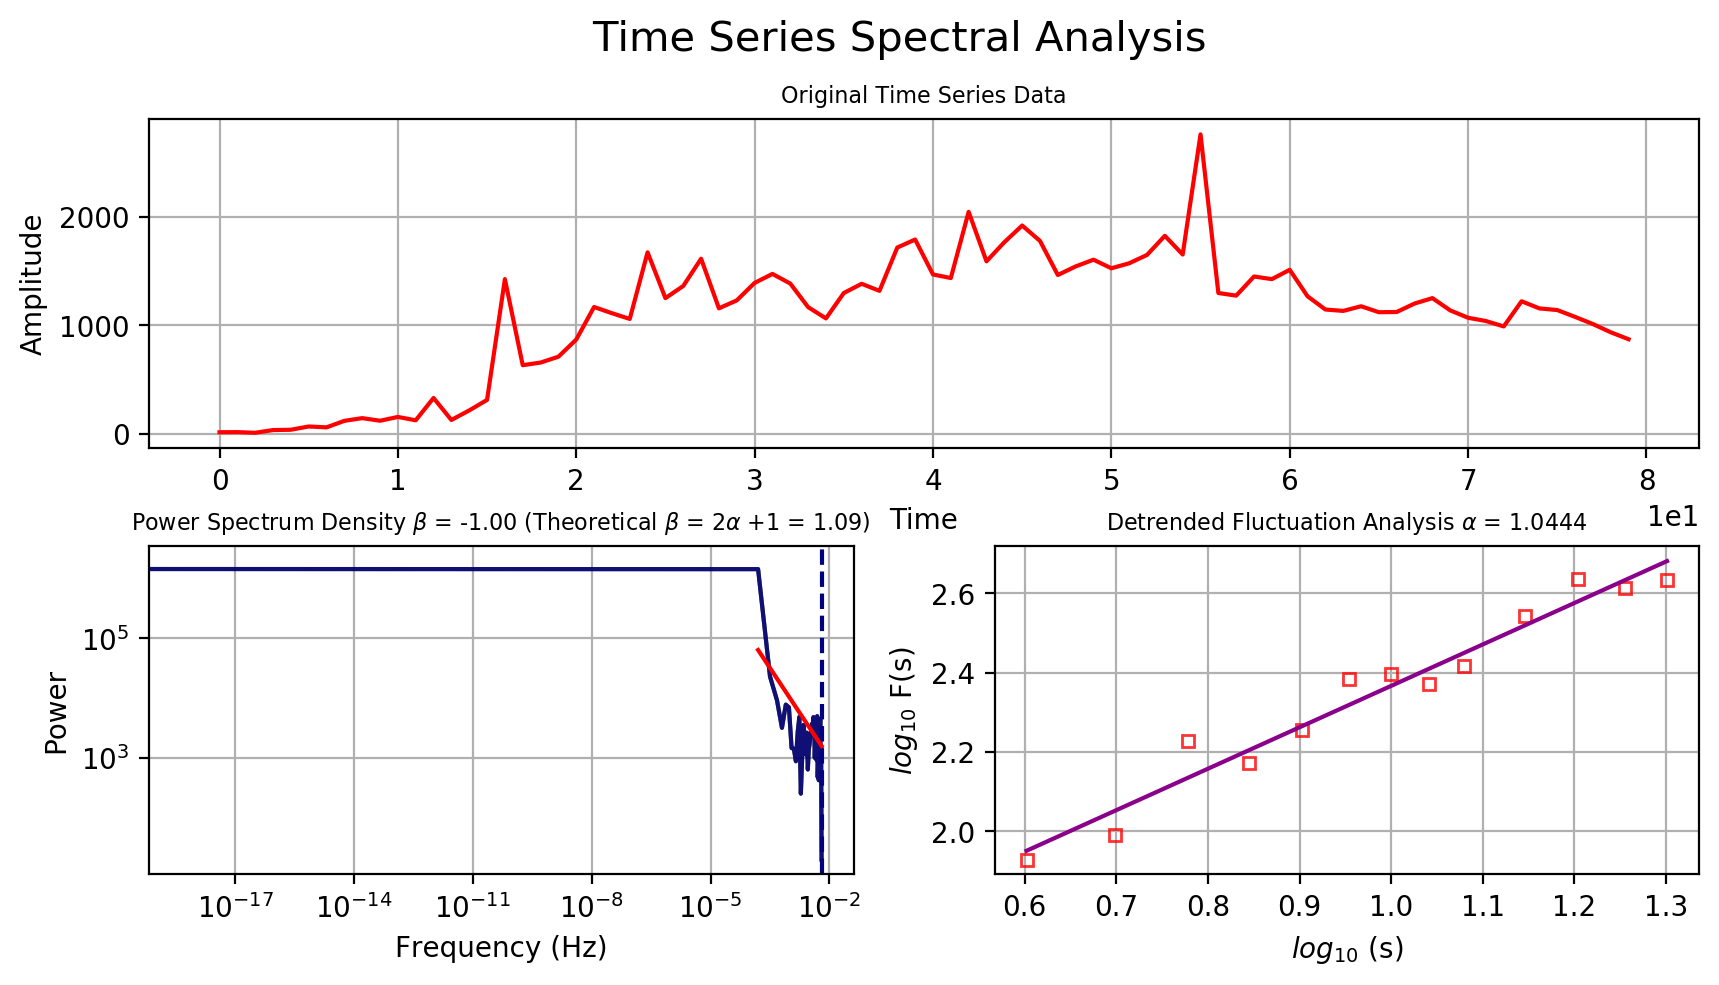

In [23]:
alpha_canada, vetoutput, x, y, reta, erro = dfa1d(covid19_casos_canada,1)
beta_canada = 2 * alpha_canada - 1

print('Alpha canada: ',alpha_canada)
print('Beta Teorico canada: ',beta_canada)

if __name__ == "__main__":
    alpha, beta_t = main(covid19_casos_canada)
    plt.show()

Alpha espana:  1.4658380876823862
Beta Teorico espana:  1.9316761753647724


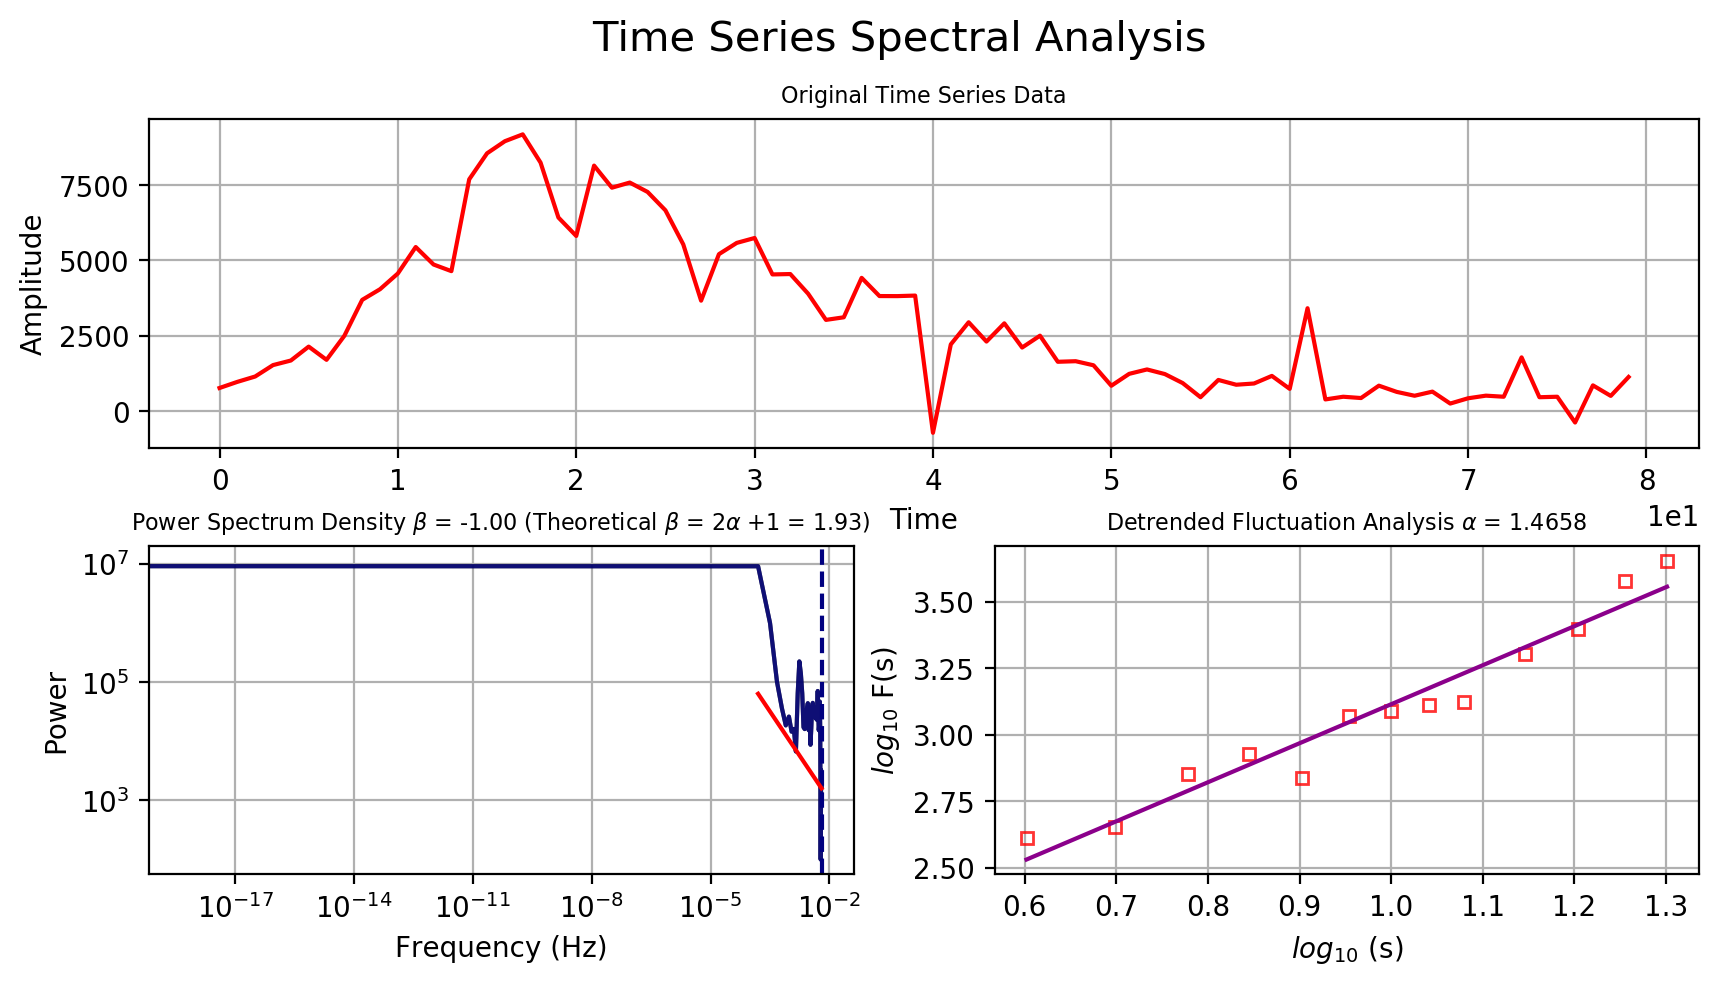

In [24]:
alpha_espana, vetoutput, x, y, reta, erro = dfa1d(covid19_casos_espana,1)
beta_espana = 2 * alpha_espana - 1

print('Alpha espana: ',alpha_espana)
print('Beta Teorico espana: ',beta_espana)

if __name__ == "__main__":
    alpha, beta_t = main(covid19_casos_espana)
    plt.show()

Alpha italia:  1.506143795326534
Beta Teorico italia:  2.012287590653068


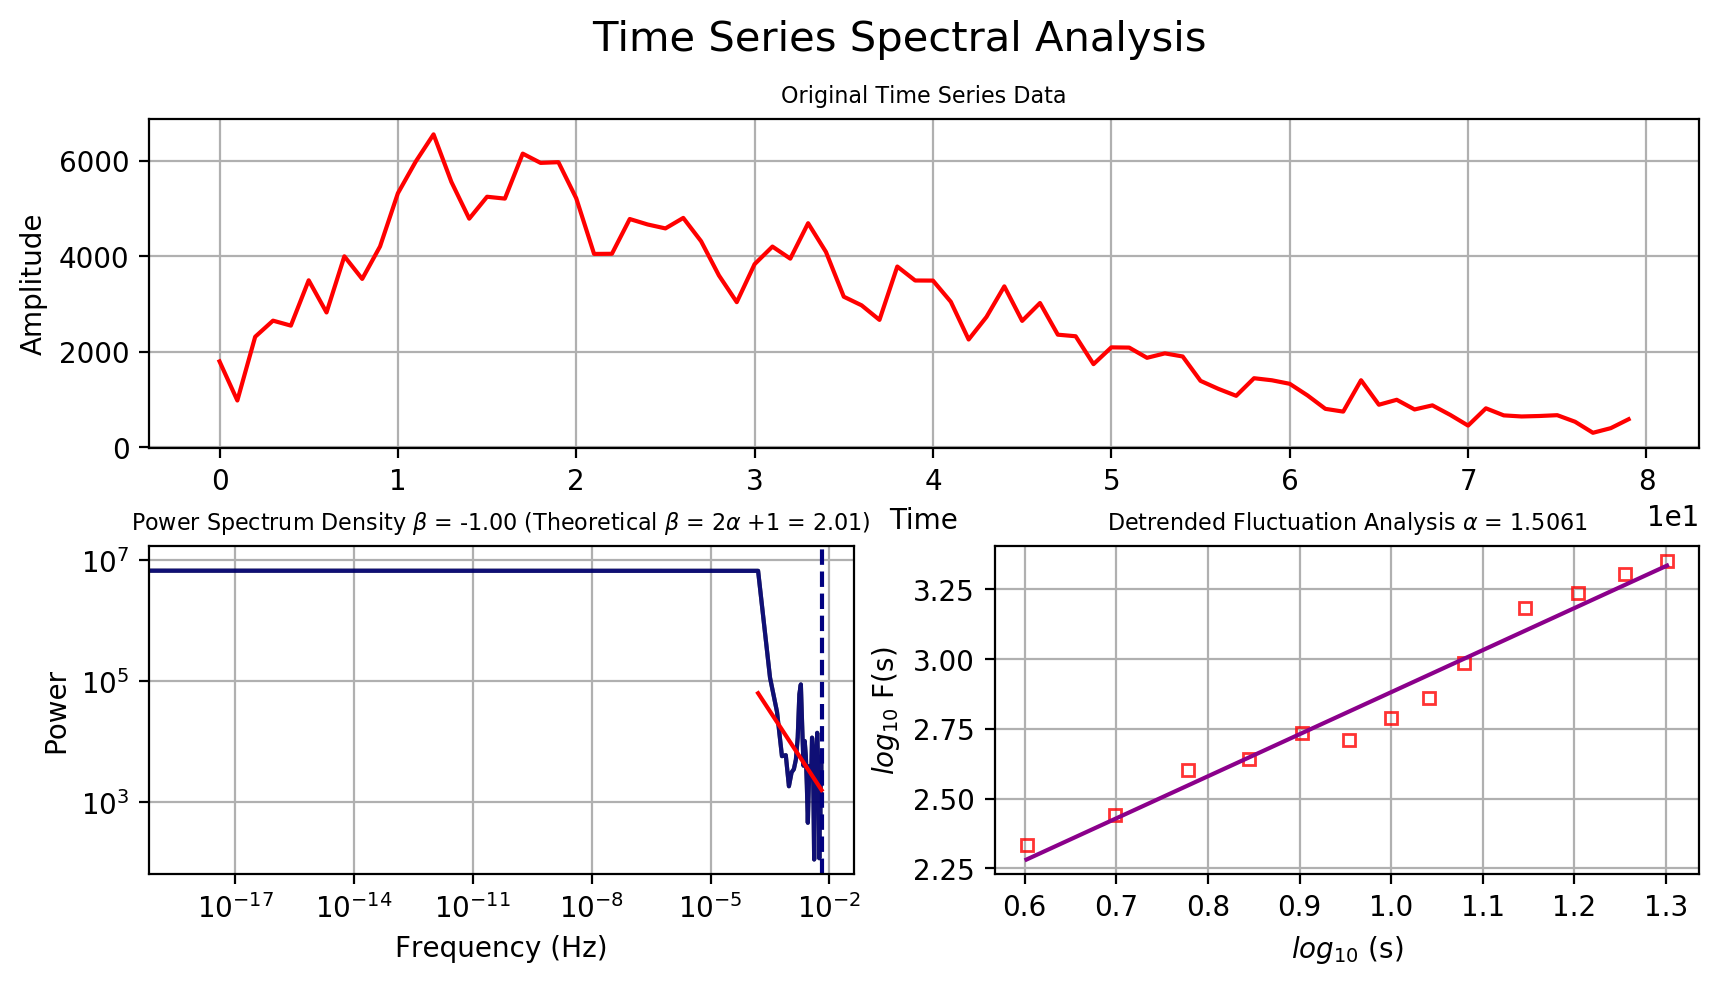

In [25]:
alpha_italia, vetoutput, x, y, reta, erro = dfa1d(covid19_casos_italia,1)
beta_italia = 2 * alpha_italia - 1

print('Alpha italia: ',alpha_italia)
print('Beta Teorico italia: ',beta_italia)

if __name__ == "__main__":
    alpha, beta_t = main(covid19_casos_italia)
    plt.show()

## Plot 5 - Espectro de Singularidades

In [26]:
def espectro_singularidad(data):
    
    timeMeasure,dataMeasure,scales,stats,q = getMSSByUpscaling(data)
    
    alpha = stats['LH']
    f_alpha = stats['f']
    
    alpha_max = stats['LH_max']
    alpha_min = stats['LH_min']
    
    j = np.where(f_alpha == max(f_alpha))
    alpha_zero = float(stats['f'][j[0]])
    
    Delta_alpha = alpha_max - alpha_min
    A_alpha = (alpha_zero - alpha_min) / (alpha_max - alpha_zero)
    
    return alpha,f_alpha,alpha_zero,Delta_alpha,A_alpha

In [27]:
alpha_b,f_alpha_b,alpha_zero_b,Delta_alpha_b,A_alpha_b = espectro_singularidad(covid19_casos_brazil)
alpha_u,f_alpha_u,alpha_zero_u,Delta_alpha_u,A_alpha_u = espectro_singularidad(covid19_casos_usa)
alpha_c,f_alpha_c,alpha_zero_c,Delta_alpha_c,A_alpha_c = espectro_singularidad(covid19_casos_canada)
alpha_e,f_alpha_e,alpha_zero_e,Delta_alpha_e,A_alpha_e = espectro_singularidad(covid19_casos_espana)
alpha_i,f_alpha_i,alpha_zero_i,Delta_alpha_i,A_alpha_i = espectro_singularidad(covid19_casos_italia)

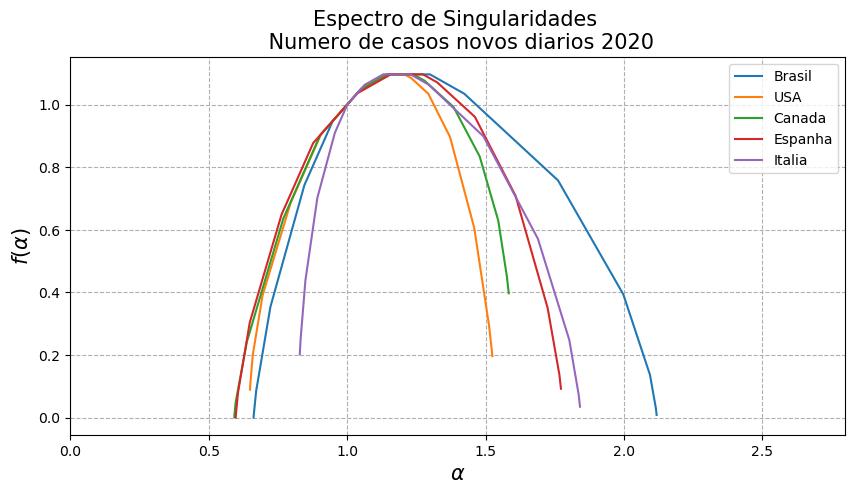

In [28]:
fig, ax = plt.subplots(figsize=(10,5),dpi=100)
plt.plot(alpha_b,f_alpha_b,label='Brasil')
plt.plot(alpha_u,f_alpha_u,label='USA')
plt.plot(alpha_c,f_alpha_c,label='Canada')
plt.plot(alpha_e,f_alpha_e,label='Espanha')
plt.plot(alpha_i,f_alpha_i,label='Italia')

plt.title('Espectro de Singularidades \n Numero de casos novos diarios 2020',fontsize=15)
plt.grid('on',linestyle='--')
plt.xlabel(r'$\alpha$',fontsize=15)
plt.ylabel(r'$f(\alpha)$',fontsize=15)
plt.xlim(0,2.8)
plt.legend()

## Apartir do exercicio 7 da lista, onde foi computado o espectro de singularidades de todas as serie usadas, para el espectro mostrado pelos datos de covid19, este se encontra mais similar ao espectro obtido das series Pm Noise (endogenas e exogenas.)

## Tabela final de valores

In [29]:
Data_b = pd.DataFrame({'Pais':'Brasil','Alpha':[alpha_brasil],'Betha':[beta_brasil],
                       'Alpha_zero':[alpha_zero_b],'Delta_Alpha':[Delta_alpha_b],'A_Alpha':[A_alpha_b]})
Data_u = pd.DataFrame({'Pais':'Usa','Alpha':[alpha_usa],'Betha':[beta_usa],
                       'Alpha_zero':[alpha_zero_u],'Delta_Alpha':[Delta_alpha_u],'A_Alpha':[A_alpha_u]})
Data_c = pd.DataFrame({'Pais':'Canada','Alpha':[alpha_canada],'Betha':[beta_canada],
                       'Alpha_zero':[alpha_zero_c],'Delta_Alpha':[Delta_alpha_c],'A_Alpha':[A_alpha_c]})
Data_e = pd.DataFrame({'Pais':'Espanha','Alpha':[alpha_espana],'Betha':[beta_espana],
                       'Alpha_zero':[alpha_zero_e],'Delta_Alpha':[Delta_alpha_e],'A_Alpha':[A_alpha_e]})
Data_i = pd.DataFrame({'Pais':'Italia','Alpha':[alpha_italia],'Betha':[beta_italia],
                       'Alpha_zero':[alpha_zero_i],'Delta_Alpha':[Delta_alpha_i],'A_Alpha':[A_alpha_i]})
finalDf = pd.concat([Data_b,Data_u,Data_c,Data_e,Data_i]).reset_index(drop=True)
finalDf.head()

,Pais,Alpha,Betha,Alpha_zero,Delta_Alpha,A_Alpha
0,Brasil,1.117322,1.234644,1.096578,1.456057,0.425581
1,Usa,0.992583,0.985166,1.096578,0.875714,1.045522
2,Canada,1.044353,1.088706,1.096578,0.991483,1.035491
3,Espanha,1.465838,1.931676,1.096578,1.175086,0.738943
4,Italia,1.506144,2.012288,1.096578,1.012457,0.359822


## Na tabela anterior pode-se ver que o Brasil tem o maior delta alfa, seguido pela Espanha e depois pela Itália.

## Usando as areas de cada uma das familias para alpha e betha, obtidas no exercicio 6 da lista

In [30]:
noise,Color_noise_pink,Color_noise_red,Color_noise_white,pm_noise,chaos_noise = Area_noise()

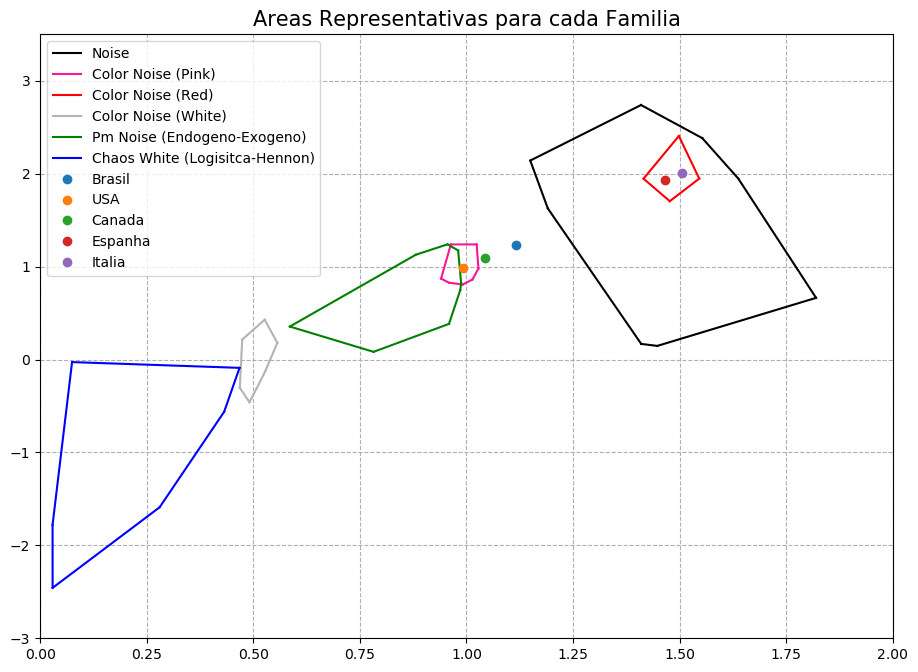

In [31]:
fig, ax = plt.subplots(figsize=(11,8),dpi=100)
for i in range(len(noise)):
    plt.plot(noise[i,0:2],noise[i,2:4],'k-',label='Noise')
    
for i in range(len(Color_noise_pink)):
    plt.plot(Color_noise_pink[i,0:2],Color_noise_pink[i,2:4],color='deeppink',label='Color Noise (Pink)')
    
for i in range(len(Color_noise_red)):
    plt.plot(Color_noise_red[i,0:2],Color_noise_red[i,2:4],'r-',label='Color Noise (Red)')
    
for i in range(len(Color_noise_white)):
    plt.plot(Color_noise_white[i,0:2],Color_noise_white[i,2:4],color='0.7',label='Color Noise (White)')
    
for i in range(len(pm_noise)):
    plt.plot(pm_noise[i,0:2],pm_noise[i,2:4],'g-',label='Pm Noise (Endogeno-Exogeno)')
    
for i in range(len(chaos_noise)):
    plt.plot(chaos_noise[i,0:2],chaos_noise[i,2:4],'b-',label='Chaos White (Logisitca-Hennon)')
    
plt.plot(alpha_brasil,beta_brasil,'o',label = 'Brasil')
plt.plot(alpha_usa,beta_usa,'o',label = 'USA')
plt.plot(alpha_canada,beta_canada,'o',label = 'Canada')
plt.plot(alpha_espana,beta_espana,'o',label = 'Espanha')
plt.plot(alpha_italia,beta_italia,'o',label = 'Italia')
    
plt.xlim(0,2)
plt.ylim(-3,3.5)
plt.grid('on',linestyle='--')

plt.title('Areas Representativas para cada Familia',fontsize=15)

handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys())

## Os pontos relacionados à Espanha e Itália, usando os resultados do exercício 6 da lista, são encontrados na area referentes ao Red Noise, embora próximos a esse ponto também estejam os sinais estocásticos gerados pelo algoritmo GRNG1.py.

## Para o USA este se encontra dentro da area referentes ao sinal do tipo Pink Noise 

## Implementacao das equacoes master do modelo IMC-SF-COVID19

In [32]:
def IMC_SF_COVID19_v1(data,p1,p2,p3):
    
    Ns_min = np.zeros([len(data)])
    Ns_max = np.zeros([len(data)])
    Ns_mean = np.zeros([len(data)])
    
    g = np.zeros([len(data)-7])
    g0 = np.zeros([len(data)-7])
    
    #(media do Ncasos_reais + [Ncasos_reais x 12]) / 2

    for i in range(73):
#         N7 = np.mean(data[i:i+7])
        N7 = (np.mean(data[i:i+7]) + 4*data[i+7])/2
        
        Nkt = data[i+7]

        if Nkt >= N7:
            g[i] = N7 / Nkt
        else:
            g[i] = Nkt / N7
            
        if i == 0:
            g0[0] = 0
        else:
            g0[i] = g[i-1]
                    
        Ns_min[i+7] = g[i] * (1*p1 + 3*p2 + 5*p3)*Nkt
        Ns_max[i+7] = g[i] * (2*p1 + 4*p2 + 6*p3)*Nkt
        
    for i in range(80):
        Ns_mean[i] = (Ns_max[i] + Ns_min[i])/2
    
    return Ns_min,Ns_max,Ns_mean

## Versao Simples - Parte A

In [33]:
p1 = 0.7
p2 = 0.25
p3 = 0.05

In [34]:
brazil_min,brazil_max,brazil_mean = IMC_SF_COVID19_v1(covid19_casos_brazil,p1,p2,p3)  
Modelo_brazil = pd.DataFrame({'Observado':covid19_casos_brazil,'Maximo':brazil_max,'Minimo':brazil_min})  

In [35]:
usa_min,usa_max,usa_mean = IMC_SF_COVID19_v1(covid19_casos_usa,p1,p2,p3)
Modelo_usa = pd.DataFrame({'Observado':covid19_casos_usa,'Maximo':usa_max,'Minimo':usa_min})

In [36]:
canada_min,canada_max,canada_mean = IMC_SF_COVID19_v1(covid19_casos_canada,p1,p2,p3)
Modelo_canada = pd.DataFrame({'Observado':covid19_casos_canada,'Maximo':canada_max,'Minimo':canada_min})

In [37]:
espana_min,espana_max,espana_mean = IMC_SF_COVID19_v1(covid19_casos_espana,p1,p2,p3)
Modelo_espana = pd.DataFrame({'Observado':covid19_casos_espana,'Maximo':espana_max,'Minimo':espana_min})

In [38]:
italia_min,italia_max,italia_mean = IMC_SF_COVID19_v1(covid19_casos_italia,p1,p2,p3)
Modelo_italia = pd.DataFrame({'Observado':covid19_casos_italia,'Maximo':italia_max,'Minimo':italia_min})

## Brasil

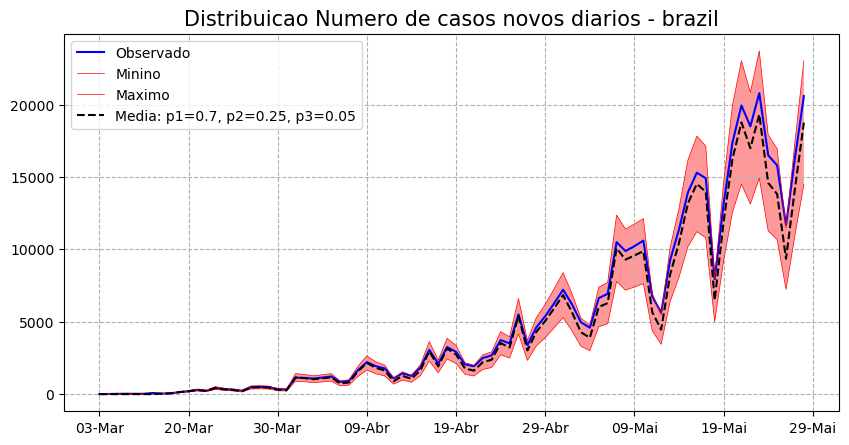

In [39]:
fig,ax = plt.subplots(figsize=(10,5),dpi=100)
plt.plot(covid19_casos_brazil,'b',label='Observado')
plt.plot(brazil_min,'r',label='Minino',linewidth=0.5)
plt.plot(brazil_max,'r',label='Maximo',linewidth=0.5)
plt.plot(brazil_mean,'--k',label='Media: p1='+str(p1)+', p2='+str(p2)+', p3='+str(p3))

labels = [item.get_text() for item in ax.get_xticklabels()]
labels[1] = '03-Mar'
labels[2] = '20-Mar'
labels[3] = '30-Mar'
labels[4] = '09-Abr'
labels[5] = '19-Abr'
labels[6] = '29-Abr'
labels[7] = '09-Mai'
labels[8] = '19-Mai'
labels[9] = '29-Mai'
plt.title('Distribuicao Numero de casos novos diarios - brazil',fontsize=15)
ax.set_xticklabels(labels)

plt.fill_between(Modelo_brazil.index,Modelo_brazil.Maximo,Modelo_brazil.Minimo,1,
                 alpha=0.4,facecolor='Red',interpolate=True)
plt.grid('on',linestyle='--')
plt.legend(loc=2)

## USA

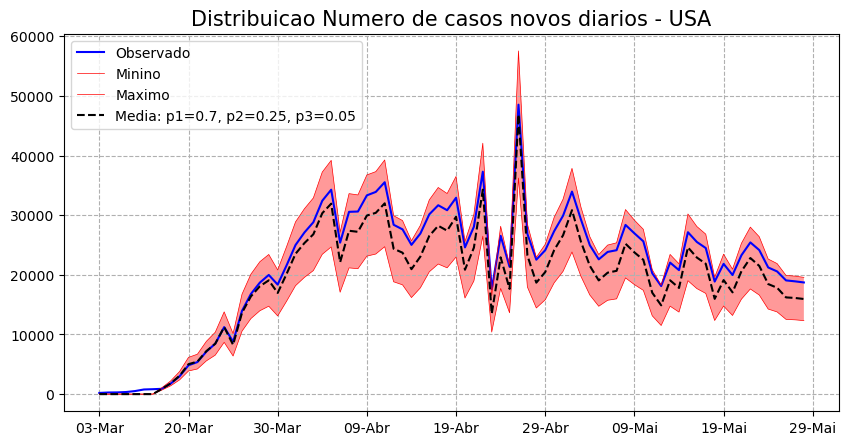

In [40]:
fig,ax = plt.subplots(figsize=(10,5),dpi=100)
plt.plot(covid19_casos_usa,'b',label='Observado')
plt.plot(usa_min,'r',label='Minino',linewidth=0.5)
plt.plot(usa_max,'r',label='Maximo',linewidth=0.5)
plt.plot(usa_mean,'--k',label='Media: p1=0.7, p2=0.25, p3=0.05')

labels = [item.get_text() for item in ax.get_xticklabels()]
labels[1] = '03-Mar'
labels[2] = '20-Mar'
labels[3] = '30-Mar'
labels[4] = '09-Abr'
labels[5] = '19-Abr'
labels[6] = '29-Abr'
labels[7] = '09-Mai'
labels[8] = '19-Mai'
labels[9] = '29-Mai'
plt.title('Distribuicao Numero de casos novos diarios - USA',fontsize=15)
ax.set_xticklabels(labels)

plt.fill_between(Modelo_usa.index,Modelo_usa.Maximo,Modelo_usa.Minimo,1,
                 alpha=0.4,facecolor='Red',interpolate=True)
plt.grid('on',linestyle='--')
plt.legend(loc=2)

## Canada

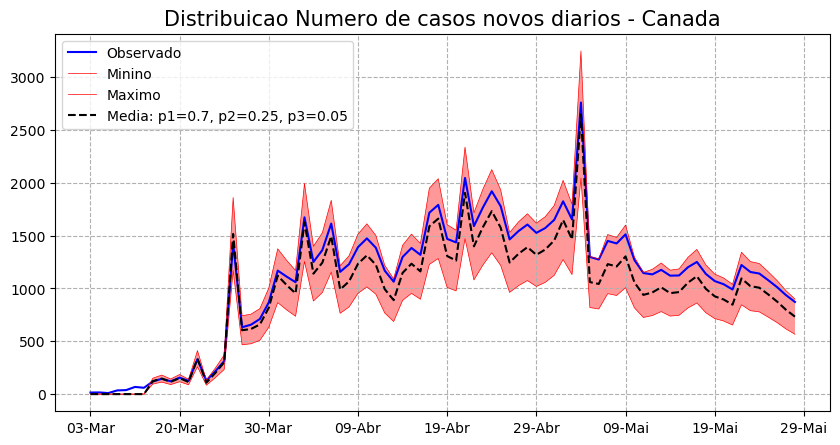

In [41]:
fig,ax = plt.subplots(figsize=(10,5),dpi=100)
plt.plot(covid19_casos_canada,'b',label='Observado')
plt.plot(canada_min,'r',label='Minino',linewidth=0.5)
plt.plot(canada_max,'r',label='Maximo',linewidth=0.5)
plt.plot(canada_mean,'--k',label='Media: p1=0.7, p2=0.25, p3=0.05')

labels = [item.get_text() for item in ax.get_xticklabels()]
labels[1] = '03-Mar'
labels[2] = '20-Mar'
labels[3] = '30-Mar'
labels[4] = '09-Abr'
labels[5] = '19-Abr'
labels[6] = '29-Abr'
labels[7] = '09-Mai'
labels[8] = '19-Mai'
labels[9] = '29-Mai'
plt.title('Distribuicao Numero de casos novos diarios - Canada',fontsize=15)
ax.set_xticklabels(labels)

plt.fill_between(Modelo_canada.index,Modelo_canada.Maximo,Modelo_canada.Minimo,1,
                 alpha=0.4,facecolor='Red',interpolate=True)
plt.grid('on',linestyle='--')
plt.legend(loc=2)

## Espana

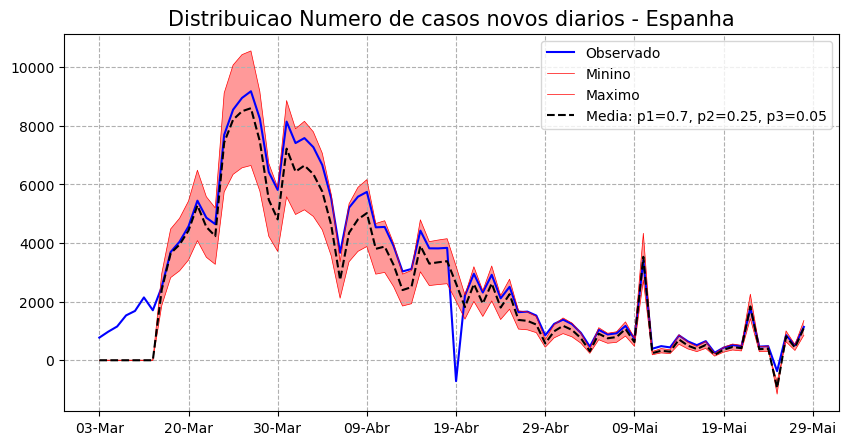

In [42]:
fig,ax = plt.subplots(figsize=(10,5),dpi=100)
plt.plot(covid19_casos_espana,'b',label='Observado')
plt.plot(espana_min,'r',label='Minino',linewidth=0.5)
plt.plot(espana_max,'r',label='Maximo',linewidth=0.5)
plt.plot(espana_mean,'--k',label='Media: p1=0.7, p2=0.25, p3=0.05')

labels = [item.get_text() for item in ax.get_xticklabels()]
labels[1] = '03-Mar'
labels[2] = '20-Mar'
labels[3] = '30-Mar'
labels[4] = '09-Abr'
labels[5] = '19-Abr'
labels[6] = '29-Abr'
labels[7] = '09-Mai'
labels[8] = '19-Mai'
labels[9] = '29-Mai'
plt.title('Distribuicao Numero de casos novos diarios - Espanha',fontsize=15)
ax.set_xticklabels(labels)

plt.fill_between(Modelo_espana.index,Modelo_espana.Maximo,Modelo_espana.Minimo,1,
                 alpha=0.4,facecolor='Red',interpolate=True)
plt.grid('on',linestyle='--')
plt.legend(loc=1)

## Italia

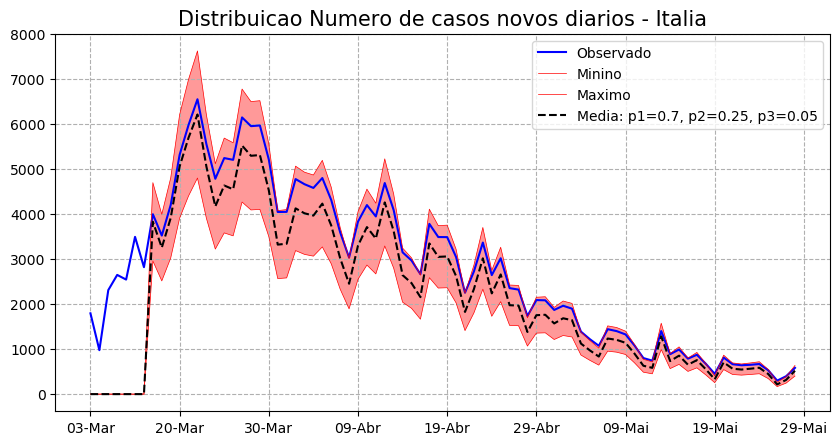

In [43]:
fig,ax = plt.subplots(figsize=(10,5),dpi=100)
plt.plot(covid19_casos_italia,'b',label='Observado')
plt.plot(italia_min,'r',label='Minino',linewidth=0.5)
plt.plot(italia_max,'r',label='Maximo',linewidth=0.5)
plt.plot(italia_mean,'--k',label='Media: p1=0.7, p2=0.25, p3=0.05')

labels = [item.get_text() for item in ax.get_xticklabels()]
labels[1] = '03-Mar'
labels[2] = '20-Mar'
labels[3] = '30-Mar'
labels[4] = '09-Abr'
labels[5] = '19-Abr'
labels[6] = '29-Abr'
labels[7] = '09-Mai'
labels[8] = '19-Mai'
labels[9] = '29-Mai'
plt.title('Distribuicao Numero de casos novos diarios - Italia',fontsize=15)
ax.set_xticklabels(labels)

plt.fill_between(Modelo_italia.index,Modelo_italia.Maximo,Modelo_italia.Minimo,1,
                 alpha=0.4,facecolor='Red',interpolate=True)
plt.grid('on',linestyle='--')
plt.legend(loc=1)

## Usando os dados observados para o modelo, este gera resultados muito boms, mas principalmente para casos onde o numero de casos novos diarios diminui como o Espanha e Italia.

## Versao com Prediccao - Parte B

In [44]:
def IMC_SF_COVID19(data,p1,p2,p3):
    
    Ns_min = np.zeros([len(data)])
    Ns_max = np.zeros([len(data)])
    Ns_mean = np.zeros([len(data)])
    
    g = np.zeros([len(data)-7])
    g0 = np.zeros([len(data)-7])

    for i in range(73):
#         N7 = np.mean(data[i:i+7])
        N7 = (np.mean(data[i:i+7]) + 4*data[i+7])/2
        
        Nkt = data[i+7]
        
        n1 = p1*Nkt
        n2 = p2*Nkt
        n3 = p3*Nkt

        if Nkt >= N7:
            g[i] = N7 / Nkt
        else:
            g[i] = Nkt / N7
                         
        Ns_min[i+7] = g[i] * (1*p1 + 3*p2 + 5*p3)*Nkt
        Ns_max[i+7] = g[i] * (2*p1 + 4*p2 + 6*p3)*Nkt
        
    for i in range(80):
        Ns_mean[i] = (Ns_max[i] + Ns_min[i])/2
        
    #Prediccion
    
    dias_pre = 13
    
    g = np.zeros([dias_pre])

    g0 = np.zeros([dias_pre])
    
    s = np.zeros([dias_pre])
    
    Ns_pre = np.zeros([8+dias_pre])
    Ns_pre[0:8] = Ns_mean[72:80]
    
    Ns_pre_min = np.zeros([8+dias_pre])
    Ns_pre_min[0:8] = Ns_min[72:80]
    
    Ns_pre_max = np.zeros([8+dias_pre])
    Ns_pre_max[0:8] = Ns_max[72:80]
    
    for i in range(dias_pre):
#         N7 = np.mean(Ns_pre[i:i+7])
        N7 = (np.mean(data[i:i+7]) + 4*data[i+7]) /2
            
        Nkt = Ns_pre[i+7]

        if Nkt >= N7:
            g[i] = N7 / Nkt
        else:
            g[i] = Nkt / N7
            
        if i == 0:
            g0[0] = 0
        else:
            g0[i] = g[i-1]
            
        Ns_pre_min[i+8] = g[i] * (1*p1 + 3*p2 + 5*p3)*Nkt
        Ns_pre_max[i+8] = g[i] * (2*p1 + 4*p2 + 6*p3)*Nkt
        
        Ns_pre[i+8] = (Ns_pre_max[i+8] + Ns_pre_min[i+8])/2
        
        q_g = (1-g[i])*(1-g[i])
        q_g0 = (1-g0[i])*(1-g0[i])

        if g0[i] >= g[i]:
            delta_g = (g0[i] - g[i]) + q_g0
        else:
            delta_g = (g0[i] - g[i]) - q_g

        delta_nk = (N7 - Nkt)/Nkt

        s[i] = (2*delta_g + delta_nk)/3
    
    return Ns_mean,Ns_pre,g,s

### Além dos dois grupos de p1, p2 e p3, outro grupo foi criado para perceber a diferença entre eles.

In [45]:
# Parametros do Modelo 1
p11 = 0.5
p12 = 0.45
p13 = 0.05

# Parametros do Modelo 2
p21 = 0.7
p22 = 0.25
p23 = 0.05

# Parametros do Modelo 3
p31 = 0.9
p32 = 0.05
p33 = 0.05

In [46]:
Ns_mean_brazil1,Ns_pre_brazil1,g_brasil1,s_brasil1 = IMC_SF_COVID19(covid19_casos_brazil,p11,p12,p13)
Ns_mean_brazil2,Ns_pre_brazil2,g_brasil2,s_brasil2 = IMC_SF_COVID19(covid19_casos_brazil,p21,p22,p23)
Ns_mean_brazil3,Ns_pre_brazil3,g_brasil3,s_brasil3 = IMC_SF_COVID19(covid19_casos_brazil,p31,p32,p33)

Ns_mean_usa1,Ns_pre_usa1,g_usa1,s_usa1 = IMC_SF_COVID19(covid19_casos_usa,p11,p12,p13)
Ns_mean_usa2,Ns_pre_usa2,g_usa2,s_usa2 = IMC_SF_COVID19(covid19_casos_usa,p21,p22,p23)
Ns_mean_usa3,Ns_pre_usa3,g_usa3,s_usa3 = IMC_SF_COVID19(covid19_casos_usa,p31,p32,p33)

Ns_mean_canada1,Ns_pre_canada1,g_canada1,s_canada1 = IMC_SF_COVID19(covid19_casos_canada,p11,p12,p13)
Ns_mean_canada2,Ns_pre_canada2,g_canada2,s_canada2 = IMC_SF_COVID19(covid19_casos_canada,p21,p22,p23)
Ns_mean_canada3,Ns_pre_canada3,g_canada3,s_canada3 = IMC_SF_COVID19(covid19_casos_canada,p31,p32,p33)

Ns_mean_espana1,Ns_pre_espana1,g_espana1,s_espana1 = IMC_SF_COVID19(covid19_casos_espana,p11,p12,p13)
Ns_mean_espana2,Ns_pre_espana2,g_espana2,s_espana2 = IMC_SF_COVID19(covid19_casos_espana,p21,p22,p23)
Ns_mean_espana3,Ns_pre_espana3,g_espana3,s_espana3 = IMC_SF_COVID19(covid19_casos_espana,p31,p32,p33)

Ns_mean_italia1,Ns_pre_italia1,g_italia1,s_italia1 = IMC_SF_COVID19(covid19_casos_italia,p11,p12,p13)
Ns_mean_italia2,Ns_pre_italia2,g_italia2,s_italia2 = IMC_SF_COVID19(covid19_casos_italia,p21,p22,p23)
Ns_mean_italia3,Ns_pre_italia3,g_italia3,s_italia3 = IMC_SF_COVID19(covid19_casos_italia,p31,p32,p33)

In [47]:
brazil1 = np.concatenate((Ns_mean_brazil1,Ns_pre_brazil1[8:]), axis=0)
brazil2 = np.concatenate((Ns_mean_brazil2,Ns_pre_brazil2[8:]), axis=0)
brazil3 = np.concatenate((Ns_mean_brazil3,Ns_pre_brazil3[8:]), axis=0)

usa1 = np.concatenate((Ns_mean_usa1,Ns_pre_usa1[8:]), axis=0)
usa2 = np.concatenate((Ns_mean_usa2,Ns_pre_usa2[8:]), axis=0)
usa3 = np.concatenate((Ns_mean_usa3,Ns_pre_usa3[8:]), axis=0)

canada1 = np.concatenate((Ns_mean_canada1,Ns_pre_canada1[8:]), axis=0)
canada2 = np.concatenate((Ns_mean_canada2,Ns_pre_canada2[8:]), axis=0)
canada3 = np.concatenate((Ns_mean_canada3,Ns_pre_canada3[8:]), axis=0)

espana1 = np.concatenate((Ns_mean_espana1,Ns_pre_espana1[8:]), axis=0)
espana2 = np.concatenate((Ns_mean_espana2,Ns_pre_espana2[8:]), axis=0)
espana3 = np.concatenate((Ns_mean_espana3,Ns_pre_espana3[8:]), axis=0)

italia1 = np.concatenate((Ns_mean_italia1,Ns_pre_italia1[8:]), axis=0)
italia2 = np.concatenate((Ns_mean_italia2,Ns_pre_italia2[8:]), axis=0)
italia3 = np.concatenate((Ns_mean_italia3,Ns_pre_italia3[8:]), axis=0)

## Resultados Previsao

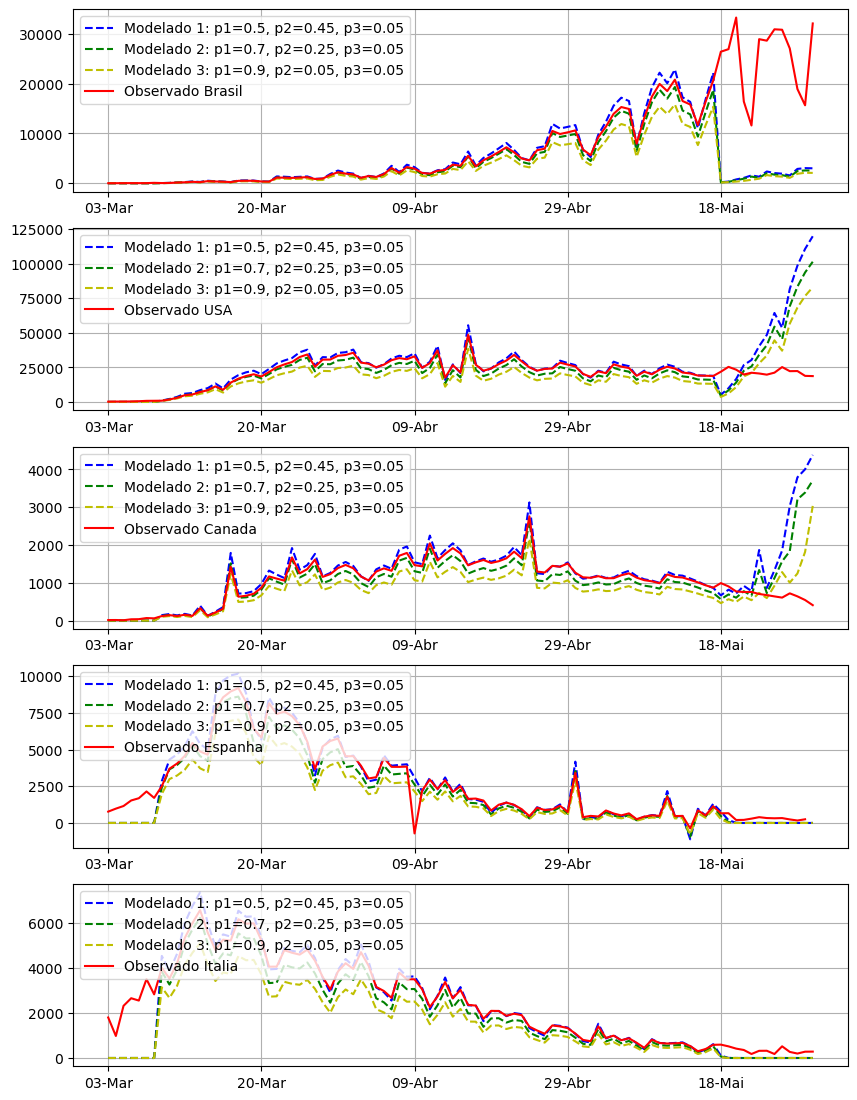

In [48]:
fig,ax = plt.subplots(figsize=(10,14),dpi=100)

label1 = 'Modelado 1: p1='+str(p11)+', p2='+str(p12)+', p3='+str(p13)
label2 = 'Modelado 2: p1='+str(p21)+', p2='+str(p22)+', p3='+str(p23)
label3 = 'Modelado 3: p1='+str(p31)+', p2='+str(p32)+', p3='+str(p33)

ax = plt.subplot(5,1,1)
plt.plot(brazil1,'--b',label=label1)
plt.plot(brazil2,'--g',label=label2)
plt.plot(brazil3,'--y',label=label3)
plt.plot(covid19_brazil.new_cases[70:170].reset_index(drop=True),'r',label='Observado Brasil')
labels = [item.get_text() for item in ax.get_xticklabels()]
labels[1] = '03-Mar'
labels[2] = '20-Mar'
labels[3] = '09-Abr'
labels[4] = '29-Abr'
labels[5] = '18-Mai'
labels[6] = '07-abr'
ax.set_xticklabels(labels)
plt.legend()
plt.grid(True)

ax = plt.subplot(5,1,2)
plt.plot(usa1,'--b',label=label1)
plt.plot(usa2,'--g',label=label2)
plt.plot(usa3,'--y',label=label3)
plt.plot(covid19_usa.new_cases[70:170].reset_index(drop=True),'r',label='Observado USA')
labels = [item.get_text() for item in ax.get_xticklabels()]
labels[1] = '03-Mar'
labels[2] = '20-Mar'
labels[3] = '09-Abr'
labels[4] = '29-Abr'
labels[5] = '18-Mai'
labels[6] = '07-abr'
ax.set_xticklabels(labels)
plt.legend(loc=2)
plt.grid(True)

ax = plt.subplot(5,1,3)
plt.plot(canada1,'--b',label=label1)
plt.plot(canada2,'--g',label=label2)
plt.plot(canada3,'--y',label=label3)
plt.plot(covid19_canada.new_cases[70:170].reset_index(drop=True),'r',label='Observado Canada')
labels = [item.get_text() for item in ax.get_xticklabels()]
labels[1] = '03-Mar'
labels[2] = '20-Mar'
labels[3] = '09-Abr'
labels[4] = '29-Abr'
labels[5] = '18-Mai'
labels[6] = '07-abr'
ax.set_xticklabels(labels)
plt.legend(loc=2)
plt.grid(True)

ax = plt.subplot(5,1,4)
plt.plot(espana1,'--b',label=label1)
plt.plot(espana2,'--g',label=label2)
plt.plot(espana3,'--y',label=label3)
plt.plot(covid19_espana.new_cases[70:170].reset_index(drop=True),'r',label='Observado Espanha')
labels = [item.get_text() for item in ax.get_xticklabels()]
labels[1] = '03-Mar'
labels[2] = '20-Mar'
labels[3] = '09-Abr'
labels[4] = '29-Abr'
labels[5] = '18-Mai'
labels[6] = '07-abr'
ax.set_xticklabels(labels)
plt.legend(loc=2)
plt.grid(True)

ax = plt.subplot(5,1,5)
plt.plot(italia1,'--b',label=label1)
plt.plot(italia2,'--g',label=label2)
plt.plot(italia3,'--y',label=label3)
plt.plot(covid19_italia.new_cases[70:170].reset_index(drop=True),'r',label='Observado Italia')
labels = [item.get_text() for item in ax.get_xticklabels()]
labels[1] = '03-Mar'
labels[2] = '20-Mar'
labels[3] = '09-Abr'
labels[4] = '29-Abr'
labels[5] = '18-Mai'
labels[6] = '07-abr'
ax.set_xticklabels(labels)
plt.legend(loc=2)
plt.grid(True)

### O problema é quando usamos dados de previsão do modelo (apartir do dia 29 de maio), pois, usando esses dados, a função representativa do número de novos casos por dia predita aumenta exponencialmente.
### os resultados mostram que quanto menor o valor de p1 o numero de infetados aumenta de forma mais divagar.

## Mostrando o s e g

## Plot 6

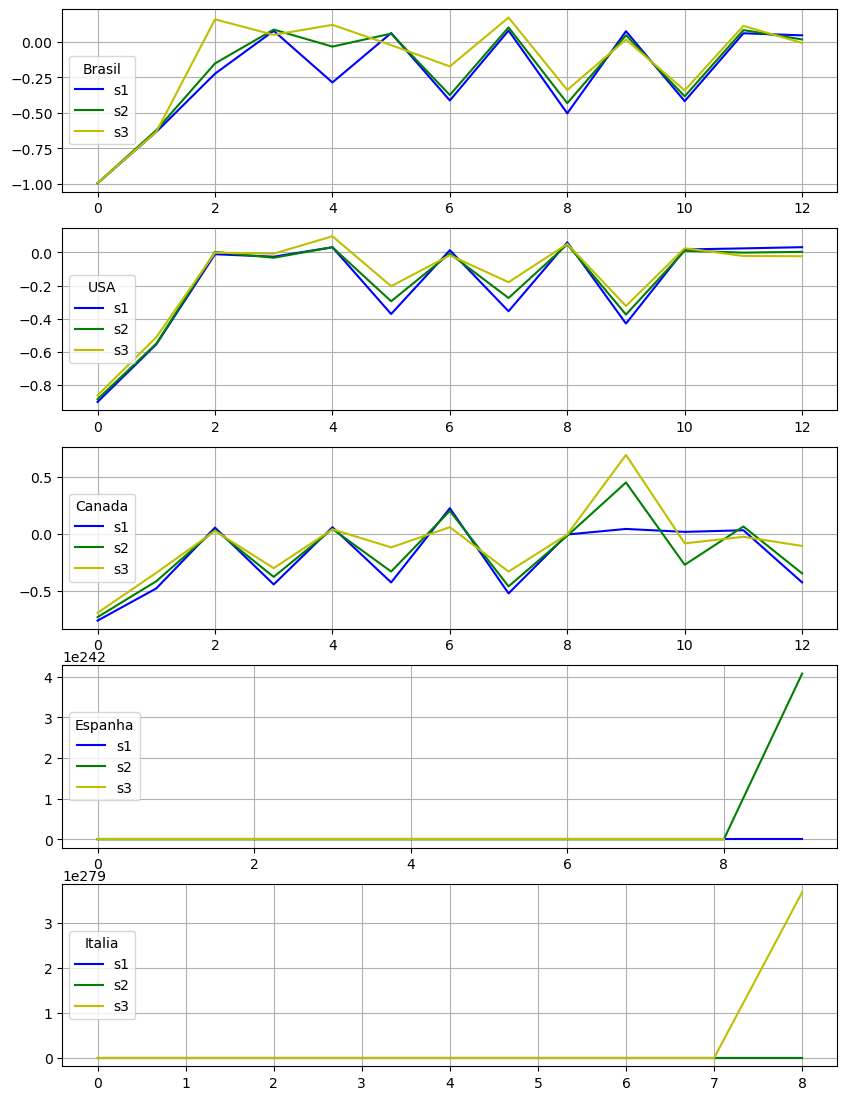

In [49]:
fig,ax = plt.subplots(figsize=(10,14),dpi=100)

label1 = 's1'
label2 = 's2'
label3 = 's3'

ax = plt.subplot(5,1,1)
plt.plot(s_brasil1,'b',label=label1)
plt.plot(s_brasil2,'g',label=label2)
plt.plot(s_brasil3,'y',label=label3)
plt.legend()
ax.legend(title='Brasil',loc='center left')
plt.grid(True)

ax = plt.subplot(5,1,2)
plt.plot(s_usa1,'b',label=label1)
plt.plot(s_usa2,'g',label=label2)
plt.plot(s_usa3,'y',label=label3)
plt.legend()
ax.legend(title='USA',loc='center left')
plt.grid(True)

ax = plt.subplot(5,1,3)
plt.plot(s_canada1,'b',label=label1)
plt.plot(s_canada2,'g',label=label2)
plt.plot(s_canada3,'y',label=label3)
plt.legend()
ax.legend(title='Canada',loc='center left')
plt.grid(True)

ax = plt.subplot(5,1,4)
plt.plot(s_espana1,'b',label=label1)
plt.plot(s_espana2,'g',label=label2)
plt.plot(s_espana3,'y',label=label3)
plt.legend()
ax.legend(title='Espanha',loc='center left')
plt.grid(True)

ax = plt.subplot(5,1,5)
plt.plot(s_italia1,'b',label=label1)
plt.plot(s_italia2,'g',label=label2)
plt.plot(s_italia3,'y',label=label3)
plt.legend()
ax.legend(title='Italia',loc='center left')
plt.grid(True)

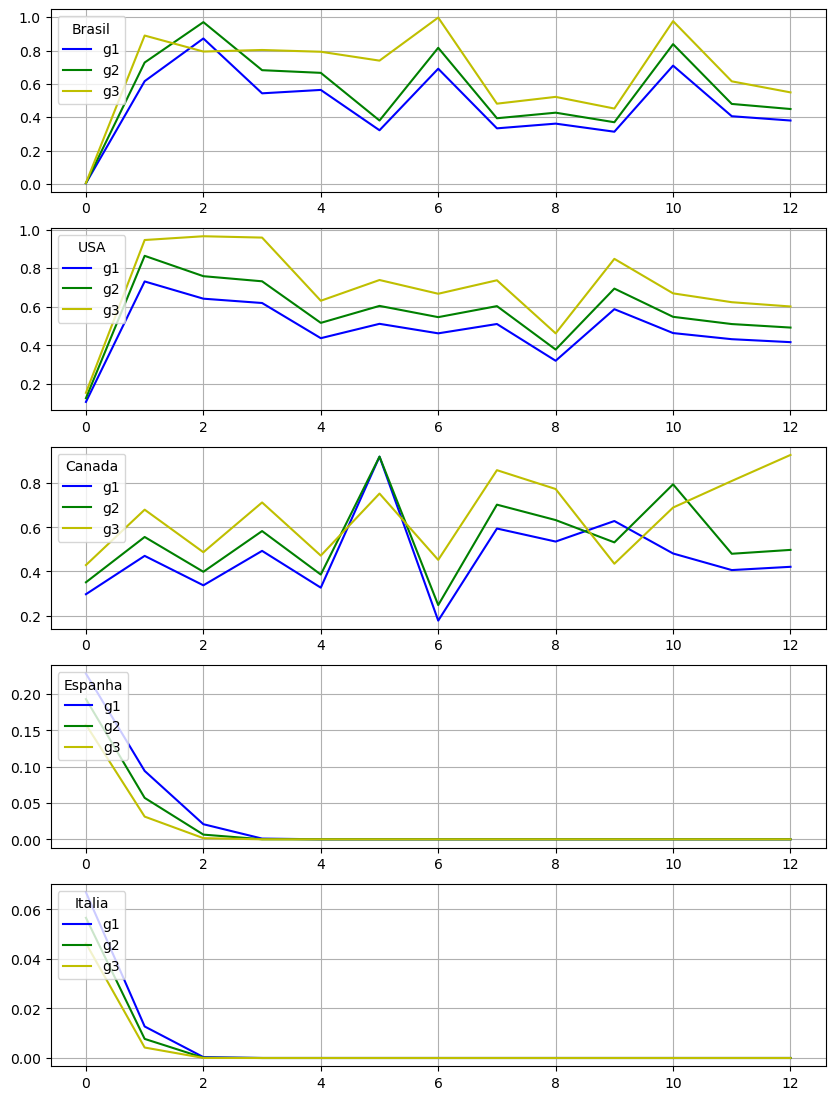

In [50]:
fig,ax = plt.subplots(figsize=(10,14),dpi=100)

label1 = 'g1'
label2 = 'g2'
label3 = 'g3'

ax = plt.subplot(5,1,1)
plt.plot(g_brasil1,'b',label=label1)
plt.plot(g_brasil2,'g',label=label2)
plt.plot(g_brasil3,'y',label=label3)
plt.legend()
ax.legend(title='Brasil',loc=2)
plt.grid(True)

ax = plt.subplot(5,1,2)
plt.plot(g_usa1,'b',label=label1)
plt.plot(g_usa2,'g',label=label2)
plt.plot(g_usa3,'y',label=label3)
plt.legend()
ax.legend(title='USA',loc=2)
plt.grid(True)

ax = plt.subplot(5,1,3)
plt.plot(g_canada1,'b',label=label1)
plt.plot(g_canada2,'g',label=label2)
plt.plot(g_canada3,'y',label=label3)
plt.legend()
ax.legend(title='Canada',loc=2)
plt.grid(True)

ax = plt.subplot(5,1,4)
plt.plot(g_espana1,'b',label=label1)
plt.plot(g_espana2,'g',label=label2)
plt.plot(g_espana3,'y',label=label3)
plt.legend()
ax.legend(title='Espanha',loc=2)
plt.grid(True)

ax = plt.subplot(5,1,5)
plt.plot(g_italia1,'b',label=label1)
plt.plot(g_italia2,'g',label=label2)
plt.plot(g_italia3,'y',label=label3)
plt.legend()
ax.legend(title='Italia',loc=2)
plt.grid(True)